In [16]:
import numpy as np

In [17]:
import matplotlib.pyplot as plt

In [18]:
import pandas as pd

#filename1=pd.read_csv("C:\\Users\\manis\\OneDrive - me.iitism.ac.in\\Desktop\\datasei11\dataset1.csv")

In [19]:
import csv


In [20]:
def loadcsv(filename):                                #function to read the .csv file 
    with open(filename,"r") as csv_file:
        line=csv.reader(csv_file,delimiter=',')
        dataset1=list(line)
        for i in range(len(dataset1)):
            dataset1[i]=[float(x) for x in dataset1[i]]     #converting the dataset into float datatype
            k=np.array(dataset1).astype(np.float)           #creating the array of floaing type
            return(k)

In [21]:
def normalization_value(X):
    #function used to normalize feature matrix,X  this later helps in calculation of probability
    
    mini=np.min(X,axis=0)
    maxi=np.max(X,axis=0)
    rang=maxi-mini
    norm_x= 1- ((maxi-X)/rang) 
    return norm_x

In [22]:
def SIGMOID_func(beta,X):
#Defining the sigmoid function which is also {h(o)i}
  return((1.00)/(1+np.exp(-np.dot(X,beta.T)))) # dot function is matrix multiplication ,also .T has transposed beta matrix


In [23]:
def logi_grad(beta,X,y):
    # this is the logistic gradient function delta
    a=X.shape[0]
    calc1=SIGMOID_func(beta,X)-y.reshape(a,-1) # this will reshape the matrix without changing its data
    calc2=np.dot(calc1.T,X)   #.T function transposes the matrix
    return(calc2) 

In [24]:
def costfunction(beta,X,y):   #defining the cost function
    log_func_v= SIGMOID_func(beta,X)
    y = np.squeeze(y)                          #converting to 0d array
    step1= y*(np.log(log_func_v))   #J function working with y=1
    step2= (1-y)*(np.log(1-log_func_v)) #J function working with y=0
    Finalans= -step1-step2  #This is the J(Beta) cost  function
    return(np.mean(Finalans))    

In [52]:
def grad_desc(X,y,beta,lr=.01,converge_change=.001):
    #gradient descent function
  
    cost = costfunction(beta, X, y)
    change_cost = 1
    num_iter = 1
      
    while(change_cost > converge_change):
        old_cost = cost
        beta = beta - (lr * logi_grad(beta, X, y))
        cost = costfunction(beta, X, y)
        change_cost = old_cost - cost
        num_iter += 1
      
    return beta, num_iter 
        

In [53]:
def predict(beta,X):
    probability=SIGMOID_func(beta,X)
    value=np.where(probability>=0.5,1,0)  # this line will find the value when probabilty is >=.5 [ 1or0] 
    return np.squeeze(value)

In [67]:
def plotregline(X,y,beta):
    x_0=X[np.where(y==0.0)]
    x_1=X[np.where(y==1.0)]
    plt.scatter([x_0[:,1]],[x_0[:,2]],c='y',label='y=0')
    plt.scatter([x_1[:,1]],[x_1[:,2]],c='b',label='y=1')
    
    #plotting the regression boundary
    x1=np.arange(0,1,0.1)
    x2= -(beta[0,0]+ beta[0,1]*x1)/beta[0,2]
    plt.plot(x1,x2,c='k',label='regression line')
    
    plt.xlabel('x1')
    plt.ylabel('x2')
   
    plt.legend()
    plt.show()

In [74]:
def main():
    
    dataset1=loadcsv("Book2.csv") #loading the csv file for data set
    
    X=normalization_value(dataset1[:,:-1]) # :-1 selects coloum  by 1 less ,normalizing the matrix
    
    X=np.hstack((np.matrix(np.ones(X.shape[0])).T,X))
    
    y=dataset1[:,-1]
    
    
    beta=np.matrix(np.zeros(X.shape[1]))
        
    beta, num_iter=grad_desc(X,y,beta)
     
    print("EStimated coefficient:  ",beta)
    print("no of iteration:  ",num_iter)
        
    y_pred= predict(beta,X)
        
    plotregline(X,y,beta)
    

In [75]:
if __name__=="__name__":
    main()

EStimated coefficient:   [[-5.84507788  5.18977804  4.88326109]]
no of iteration:   898


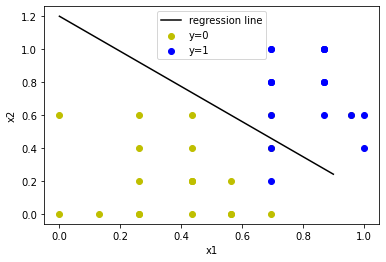

In [76]:
main()